In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [40]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long() # Here we have to convert y_train to long(integer in pytorch), since pytorch 
                                           # requires categorical values to be represented by integers.

X_test = scaler.transform(X_test)
X_test = torch.from_numpy(X_test).float()

y_test = torch.from_numpy(y_test).long()

train = TensorDataset(X_train, y_train)

torch.manual_seed(11)
batch_size = 2
train_data = DataLoader(train, batch_size, shuffle=True)

In [41]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.first = nn.Linear(input_size, hidden_size)
        self.second = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = self.first(x)
        x = nn.Sigmoid()(x)
        x = self.second(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [45]:
input_size = X_train.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_func = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [46]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(1, num_epochs+1):
    for x, y in train_data:
        y_pred = model(x)
        loss = loss_func(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch-1] += loss.item()*y.size(0)
        is_correct = (torch.argmax(y_pred, dim=1) == y).float()
        accuracy_hist[epoch-1] += is_correct.sum()
    loss_hist[epoch-1] /= len(train_data.dataset)
    accuracy_hist[epoch-1] /= len(train_data.dataset)    
        

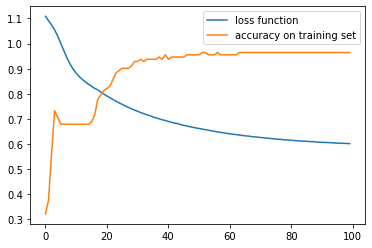

In [48]:
plt.plot(loss_hist, label='loss function')
plt.plot(accuracy_hist, label='accuracy on training set')
plt.legend()
plt.show()

In [49]:
pred_test = model(X_test)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9211
